In [1]:
pip install tensorflow fastdup opencv-python matplotlib

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define image size and batch size
img_height, img_width = 224, 224
batch_size = 32

# Set up ImageDataGenerator for training and validation
datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/vehicle_dataset/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/vehicle_dataset/val',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
)

class_labels = list(train_generator.class_indices.keys())
print("Class labels:", class_labels)


Found 2719 images belonging to 12 classes.
Found 765 images belonging to 12 classes.
Class labels: ['auto-rickshaw', 'bicycle', 'bus', 'car', 'e-rickshaw', 'mini-bus', 'mini-truck', 'motorcycle', 'rickshaw', 'tractor', 'truck', 'van']


In [8]:
import fastdup
fd = fastdup.create(work_dir="/content/drive/MyDrive/vehicle_dataset/fastdup_results", input_dir="/content/drive/MyDrive/vehicle_dataset/train")
fd.run()

Fastdup was already applied, use overwrite=True to re-run



fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/vehicle_dataset/train"
Work directory is set to "drive/MyDrive/vehicle_dataset/fastdup_results"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



In [9]:
fd.summary()


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 2719 images
    Valid images are 100.00% (2,719) of the data, invalid are 0.00% (0) of the data
    Outliers: 6.44% (175) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.



['Dataset contains 2719 images',
 'Valid images are 100.00% (2,719) of the data, invalid are 0.00% (0) of the data',
 'Outliers: 6.44% (175) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.\n']

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similarity visual view in  drive/MyDrive/vehicle_dataset/fastdup_results/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



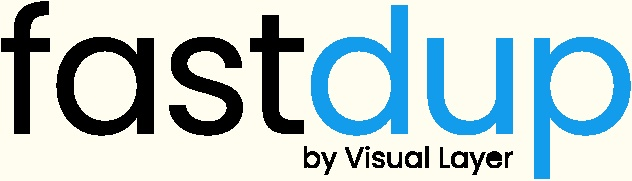
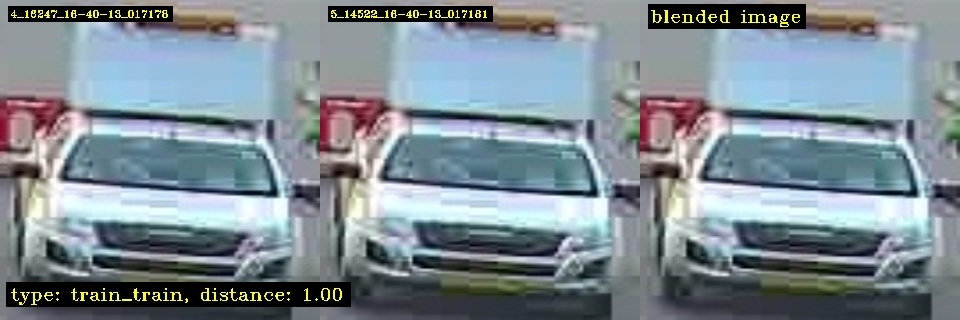
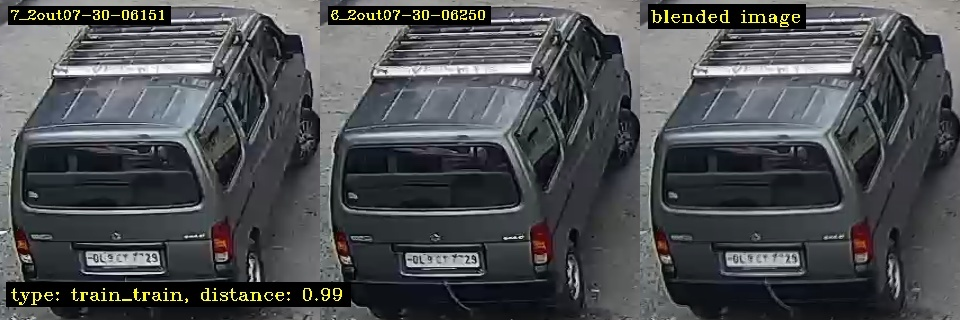
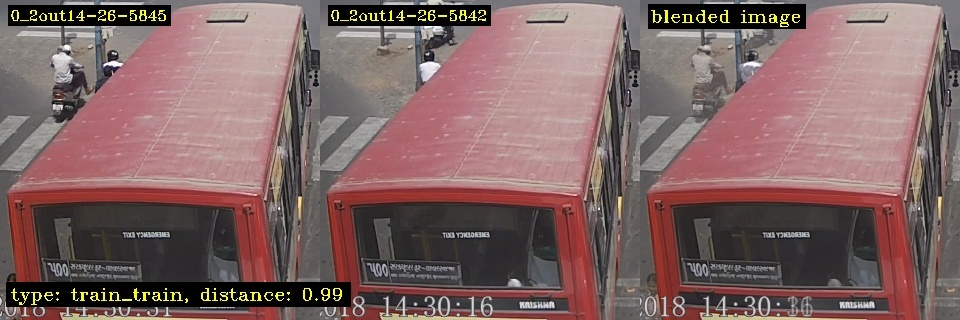
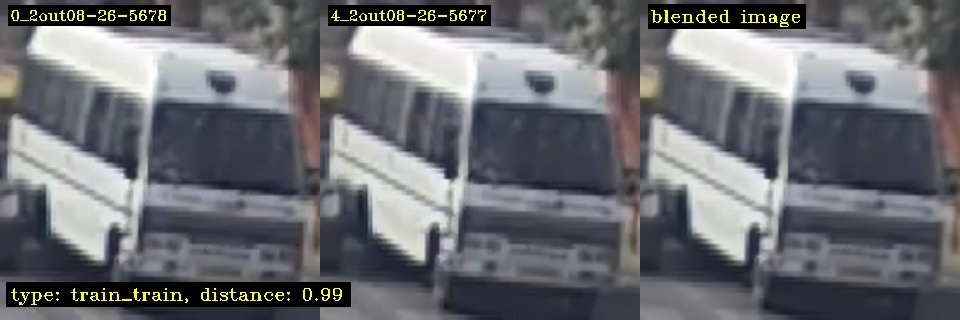
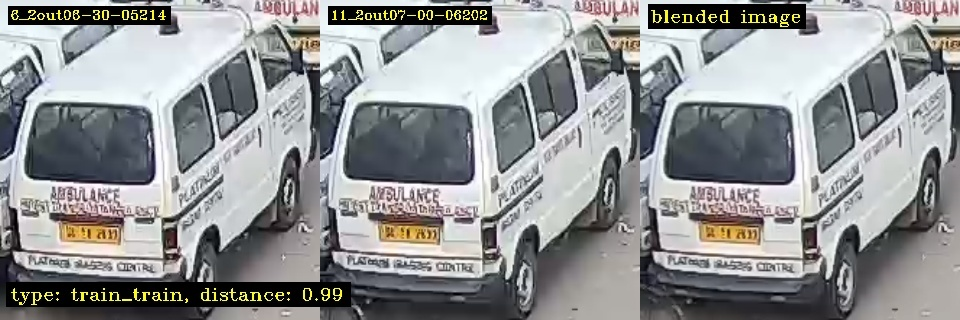
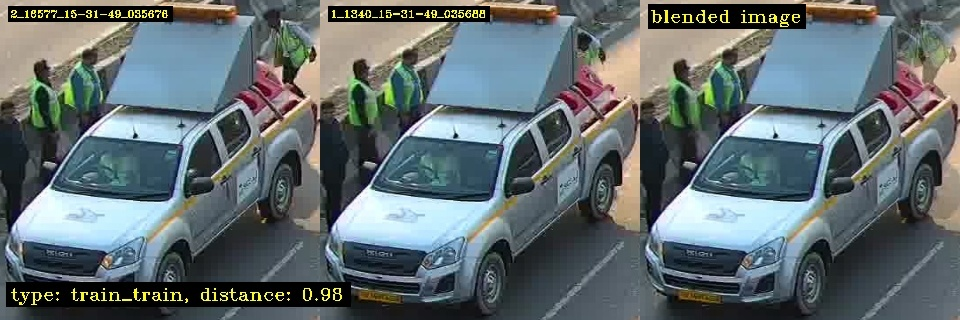
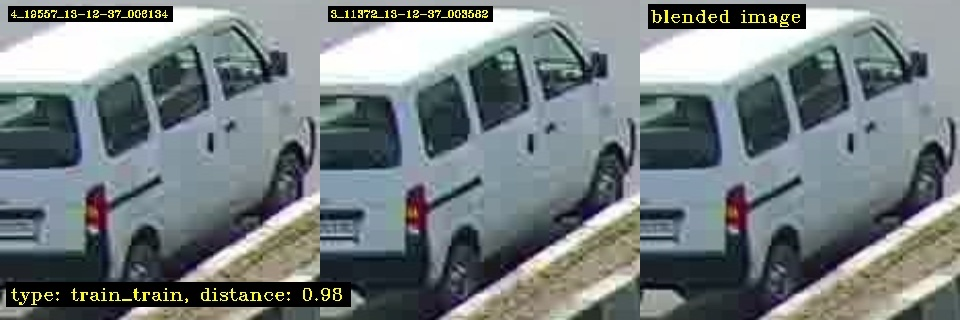
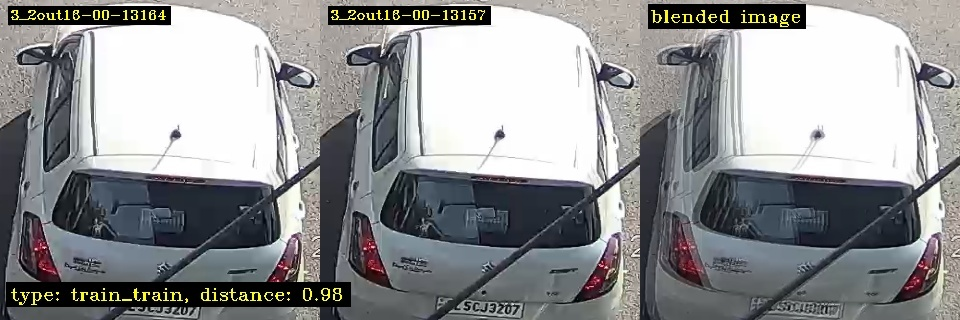
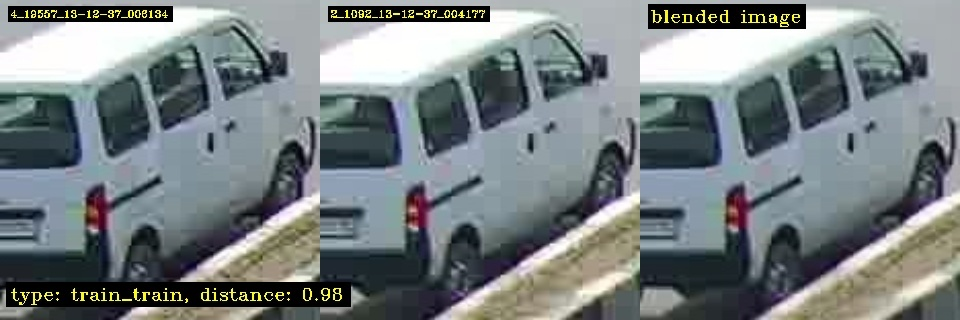
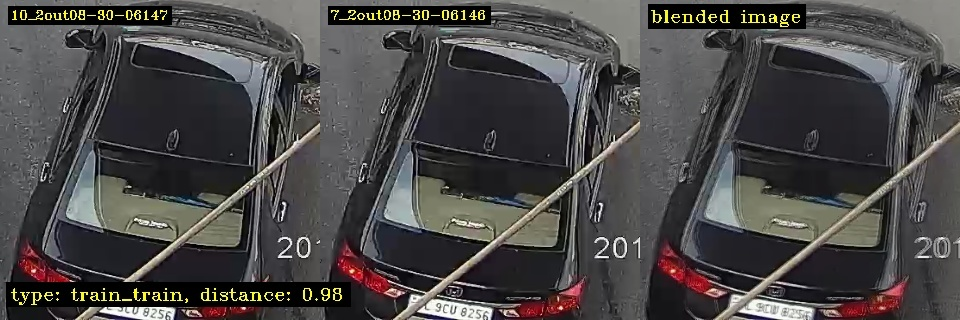

0

In [10]:
fd.vis.duplicates_gallery()

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored mean visual view in  drive/MyDrive/vehicle_dataset/fastdup_results/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



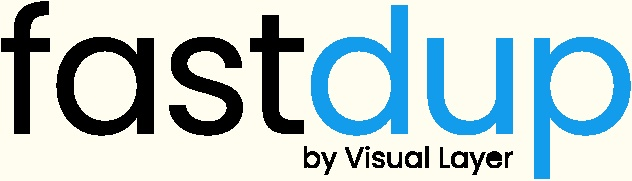
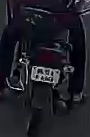
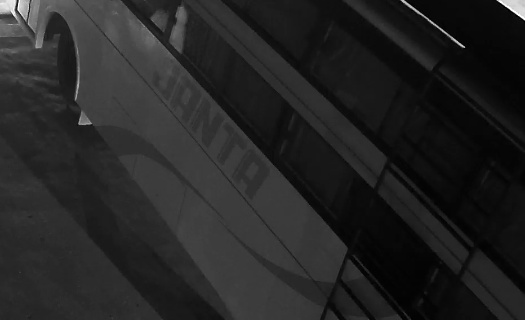
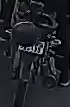
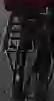
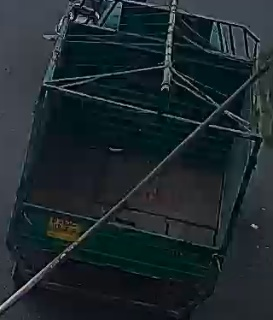
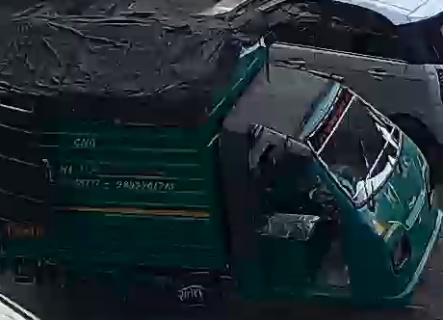
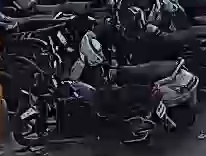
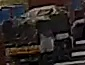
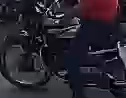
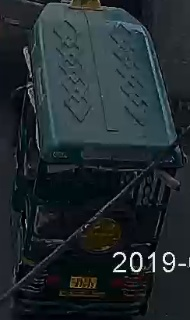
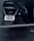
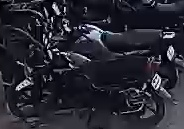
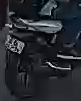
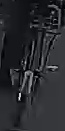
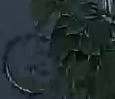
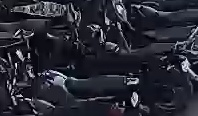
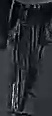
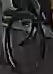
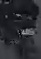
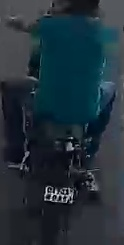

0

In [11]:
fd.vis.stats_gallery()

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similar images visual view in  drive/MyDrive/vehicle_dataset/fastdup_results/galleries/similarity.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



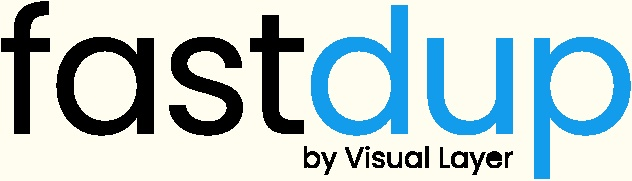
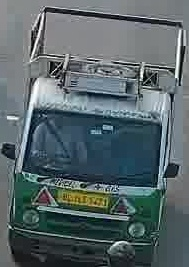
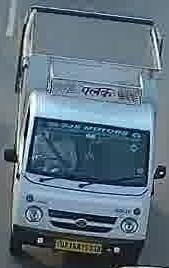
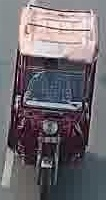
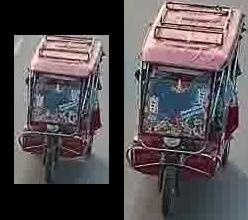
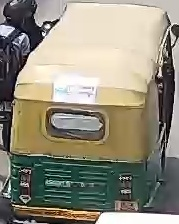
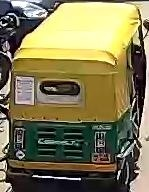
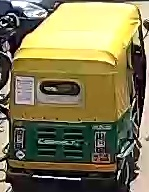
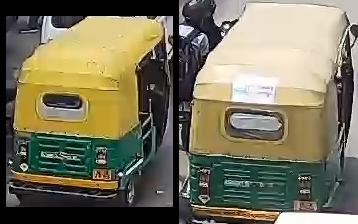
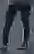
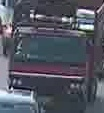
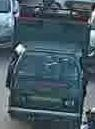
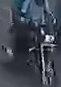
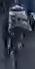
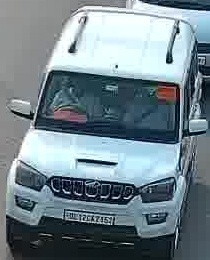
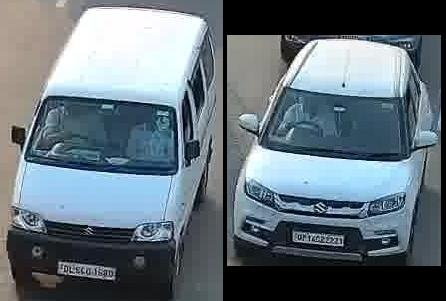
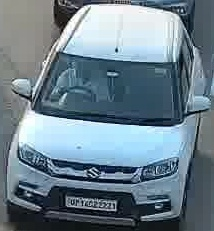
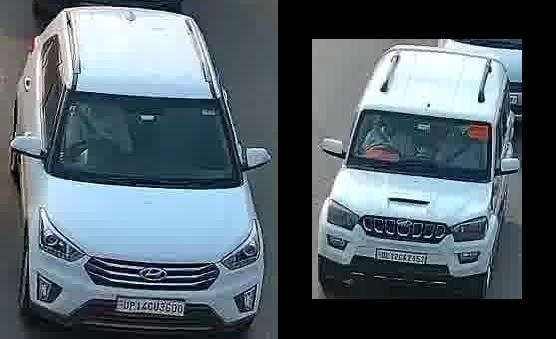
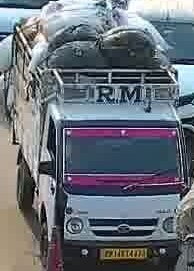
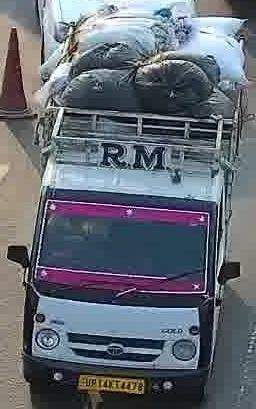
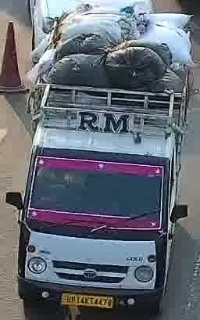
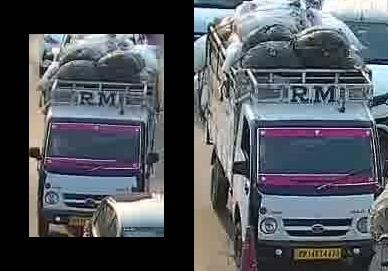
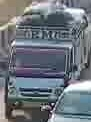
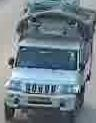
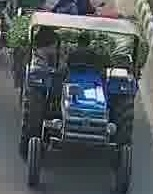
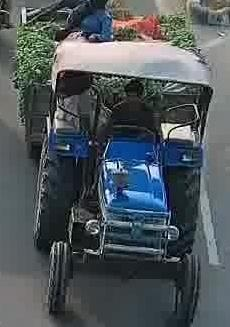
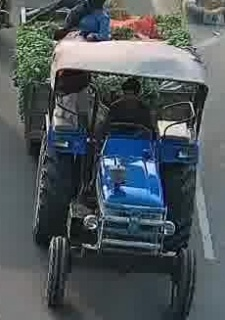
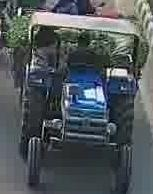
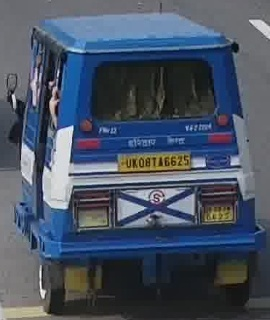
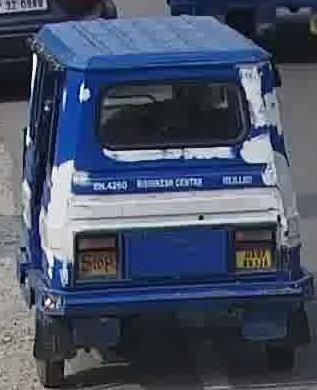
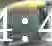
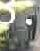
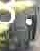
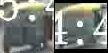
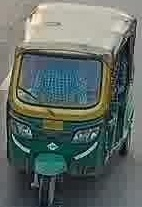
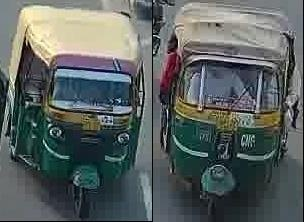
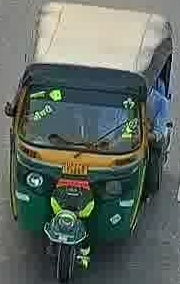
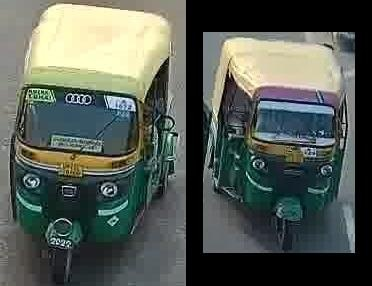
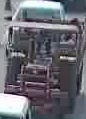
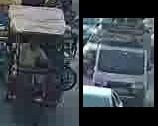

,from,to,distance
642,drive/MyDrive/vehicle_dataset/train/mini-truck/2_37048_15-31-49_033630.jpg,[drive/MyDrive/vehicle_dataset/train/mini-truck/2_37364_15-31-49_031235.jpg],[0.900117]
514,drive/MyDrive/vehicle_dataset/train/e-rickshaw/7_43823_14-31-49_040949.jpg,"[drive/MyDrive/vehicle_dataset/train/e-rickshaw/0_43691_16-01-50_015115.jpg, drive/MyDrive/vehicle_dataset/train/e-rickshaw/3_12785_16-01-50_015081.jpg]","[0.900142, 0.919594]"
982,drive/MyDrive/vehicle_dataset/train/truck/4_2out11-30-1282.png,[drive/MyDrive/vehicle_dataset/train/truck/13_vlcsnap-2020-01-08-17h33m11s390.png],[0.900144]
893,drive/MyDrive/vehicle_dataset/train/truck/13_vlcsnap-2020-01-08-17h33m11s390.png,"[drive/MyDrive/vehicle_dataset/train/truck/4_2out11-30-1282.png, drive/MyDrive/vehicle_dataset/train/truck/15_2out10-00-10138.png]","[0.900144, 0.902596]"
341,drive/MyDrive/vehicle_dataset/train/bicycle/27_2out14-30-09263.png,[drive/MyDrive/vehicle_dataset/train/bicycle/22_2out15-00-10138.png],[0.900198]
...,...,...,...
412,drive/MyDrive/vehicle_dataset/train/bus/4_2out08-26-5677.png,[drive/MyDrive/vehicle_dataset/train/bus/0_2out08-26-5678.png],[0.987038]
373,drive/MyDrive/vehicle_dataset/train/bus/0_2out14-26-5845.png,[drive/MyDrive/vehicle_dataset/train/bus/0_2out14-26-5842.png],[0.988803]
372,drive/MyDrive/vehicle_dataset/train/bus/0_2out14-26-5842.png,[drive/MyDrive/vehicle_dataset/train/bus/0_2out14-26-5845.png],[0.988803]
1341,drive/MyDrive/vehicle_dataset/train/van/6_2out07-30-06250.png,[drive/MyDrive/vehicle_dataset/train/van/7_2out07-30-06151.png],[0.988972]


In [12]:
fd.vis.similarity_gallery()

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(rescale=1./255)


In [14]:
img_height, img_width = 224, 224
batch_size = 32

# Load training data
train_generator = datagen_train.flow_from_directory(
    '/content/drive/MyDrive/vehicle_dataset/train/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
)

# Load validation data
validation_generator = datagen_val.flow_from_directory(
    '/content/drive/MyDrive/vehicle_dataset/val/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
)

# Get class labels
class_labels = list(train_generator.class_indices.keys())
print("Class labels:", class_labels)


Found 2719 images belonging to 12 classes.
Found 765 images belonging to 12 classes.
Class labels: ['auto-rickshaw', 'bicycle', 'bus', 'car', 'e-rickshaw', 'mini-bus', 'mini-truck', 'motorcycle', 'rickshaw', 'tractor', 'truck', 'van']


In [15]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(class_labels), activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,684,684 (36.94 MB)

 Trainable params: 9,684,684 (36.94 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
epochs = 20

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
)


Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.3723 - loss: 1.7786 - precision: 0.5155 - recall: 0.0831 - val_accuracy: 0.4719 - val_loss: 1.5576 - val_precision: 0.6202 - val_recall: 0.1686
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 68s 528ms/step - accuracy: 0.4243 - loss: 1.6266 - precision: 0.5903 - recall: 0.1677 - val_accuracy: 0.5268 - val_loss: 1.4604 - val_precision: 0.7521 - val_recall: 0.2301
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 49s 537ms/step - accuracy: 0.4895 - loss: 1.4785 - precision: 0.6933 - recall: 0.2636 - val_accuracy: 0.5634 - val_loss: 1.2985 - val_precision: 0.7261 - val_recall: 0.3569
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 534ms/step - accuracy: 0.5324 - loss: 1.3810 - precision: 0.7213 - recall: 0.3586 - val_accuracy: 0.5922 - val_loss: 1.2319 - val_precision: 0.7451 - val_recall: 0.4431
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 47s 521ms/step - accuracy: 0.5486 - loss: 1.3033 - precision: 0.7129 - recall: 0.3855 - val_accuracy: 0.6131 - val_loss:

In [19]:
results = model.evaluate(validation_generator)
val_loss = results[0]
val_accuracy = results[1]
val_precision = results[2]
val_recall = results[3]
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Precision: {val_precision}')
print(f'Validation Recall: {val_recall}')
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.7637 - loss: 0.7412 - precision: 0.8102 - recall: 0.7265
Validation Loss: 0.7283816933631897
Validation Accuracy: 0.7568627595901489
Validation Precision: 0.8109305500984192
Validation Recall: 0.7176470756530762
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step
[[14 11 16  2  2  0 19 12  0  5 35 21]
 [ 9  4  4  1  0  0 12  4  1  4 18 12]
 [ 6 11  8  2  2  0 12  4  0  0 12 14]
 [ 9  1  0  1  1  0  2  1  0  0 11  9]
 [ 2  0  1  0  0  0  0  0  0  0  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1]
 [11 11 12  3  2  0 16  9  0  1 20 17]
 [11  7  3  1  4  0  9  5  0  3 20  6]
 [ 1  1  0  0  0  0  3  2  0  0  2  3]
 [ 0  0  0  0  0  0  0  0  0  0  2  1]
 [22  9 16  3  2  0 21 20  0  0 46 18]
 [19 15  5  4  1  1 10 12  2  0 22 12]]
               precision    recall  f1-score   support

auto-rickshaw       0.13      0.10      0.12       137
      bicycle       0.06      0.06      0.06        69
          bus       0.12      0.11      0.12        71
  

In [20]:
model.save("vehicle_model.keras")

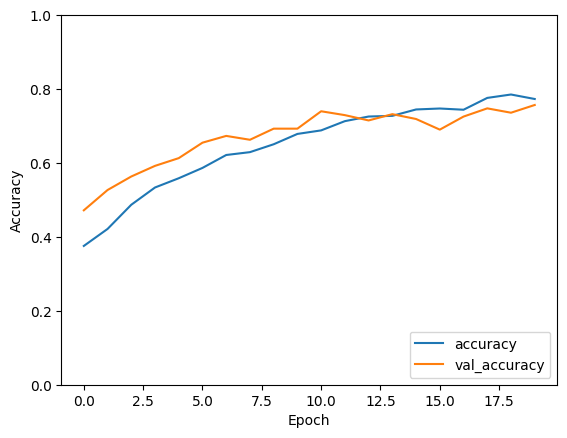

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

val_generator = validation_generator
val_generator.reset()
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix')
print(cm)

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print('Classification Report')
print(report)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step
Confusion Matrix
[[23 15 13  3  2  0 23 11  2  2 31 12]
 [ 5  7  6  1  2  0  9  8  0  0 17 14]
 [10  4 11  4  2  0 11  9  0  3 11  6]
 [ 3  3  1  1  2  0  4  5  0  1  9  6]
 [ 0  1  0  0  1  0  1  1  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1]
 [14  8  9  1  1  0 11  7  0  0 37 14]
 [11  5  7  2  0  0  7  6  0  0 17 14]
 [ 0  1  0  0  1  0  4  1  0  0  3  2]
 [ 0  1  0  0  0  0  1  0  0  1  0  0]
 [24 14 11  2  2  1 20 13  0  3 44 23]
 [14 11  7  3  1  0 13  8  1  3 20 22]]
Classification Report
               precision    recall  f1-score   support

auto-rickshaw       0.22      0.17      0.19       137
      bicycle       0.10      0.10      0.10        69
          bus       0.17      0.15      0.16        71
          car       0.06      0.03      0.04        35
   e-rickshaw       0.07      0.17      0.10         6
     mini-bus       0.00      0.00      0.00         1
   mini-truck       0.11      0.11      0.11       102
   motorcy

In [40]:
model = tf.keras.models.load_model('vehicle_model.h5',compile=False)  # Load .h5 file directly


In [24]:
model.save("vehicle_model.h5")

In [29]:
pip install tf2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 102.5 MB/s eta 0:00:00


In [41]:
import tensorflow as tf
import tf2onnx

# Load your .h5 model
model = tf.keras.models.load_model('vehicle_model.h5')

# Convert the Keras model to ONNX
onnx_model, _ = tf2onnx.convert.from_keras(model)

# Save the ONNX model
with open("vehicle_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


AttributeError: 'Sequential' object has no attribute 'output_names'

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
model = tf.keras.models.load_model('vehicle_model.h5')



def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array


def predict_image(model, img_array, class_indices):
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

image_path = '/content/drive/MyDrive/vehicle_dataset/val/van/0_10378_16-40-13_019302.jpg'
img_array = preprocess_image(image_path)
predicted_label = predict_image(model, img_array, train_generator.class_indices)
print(f'The image is classified as: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
The image is classified as: van


In [34]:
import tensorflow as tf

# Load your model from the .h5 file
model = tf.keras.models.load_model('vehicle_model.h5')

# Save the model in TensorFlow SavedModel format
model.export('vehicle_saved_model')  # No need for save_format='tf'


Saved artifact at 'vehicle_saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 12), dtype=tf.float32, name=None)
Captures:
  140077235532224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140077235634416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140077235644800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140077235648672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140077233722768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140077233725056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140077233729280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140077233731568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140077233967120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140077233969936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14007723397

In [42]:
!python -m tf2onnx.convert --saved-model vehicle_saved_model --output vehicle_model.onnx


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
I0000 00:00:1723403671.379960   28231 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723403671.432748   28231 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723403671.433047   28231 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA n

In [43]:
pip install onnxruntime

In [45]:
import onnxruntime as ort
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

onnx_session = ort.InferenceSession("vehicle_model.onnx")

img_path = '/content/drive/MyDrive/vehicle_dataset/val/bus/0_14389_16-40-13_002513.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


inputs = {onnx_session.get_inputs()[0].name: img_array}
predictions = onnx_session.run(None, inputs)
print(predictions)

[array([[9.9999762e-01, 3.5261783e-35, 1.4396619e-07, 1.0112510e-26,
        4.6559718e-18, 0.0000000e+00, 0.0000000e+00, 2.2315376e-06,
        5.7494909e-25, 0.0000000e+00, 9.4098871e-09, 0.0000000e+00]],
      dtype=float32)]


In [46]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [47]:
from tensorflow.keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
lr_scheduler = LearningRateScheduler(scheduler)
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[lr_scheduler]
)

Epoch 1/20


Extracting metadata:   0%|          | 0/3 [46:31<?, ?it/s]


85/85 ━━━━━━━━━━━━━━━━━━━━ 88s 848ms/step - accuracy: 0.1593 - loss: 2.3977 - val_accuracy: 0.2706 - val_loss: 2.0705 - learning_rate: 0.0010
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 51s 549ms/step - accuracy: 0.2230 - loss: 2.1706 - val_accuracy: 0.2118 - val_loss: 2.0257 - learning_rate: 0.0010
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 528ms/step - accuracy: 0.2420 - loss: 2.1165 - val_accuracy: 0.2889 - val_loss: 1.9272 - learning_rate: 0.0010
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 49s 529ms/step - accuracy: 0.2321 - loss: 2.0915 - val_accuracy: 0.3412 - val_loss: 1.8250 - learning_rate: 0.0010
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 54s 597ms/step - accuracy: 0.2607 - loss: 2.0166 - val_accuracy: 0.3556 - val_loss: 1.8434 - learning_rate: 0.0010
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 78s 547ms/step - accuracy: 0.2739 - loss: 2.0222 - val_accuracy: 0.3333 - val_loss: 1.8420 - learning_rate: 0.0010
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 49s 537ms/step - accuracy: 0.2913 - loss: 1.9635 - val_

ValueError: The output of the `schedule` function should be a float. Got: 0.0009048373904079199

In [48]:
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf # Import tensorflow

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1).numpy() # Convert tensor to float using .numpy()

lr_scheduler = LearningRateScheduler(scheduler)
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[lr_scheduler]
)

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 48s 533ms/step - accuracy: 0.3013 - loss: 1.9531 - val_accuracy: 0.3634 - val_loss: 1.7771 - learning_rate: 0.0010
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 49s 524ms/step - accuracy: 0.3081 - loss: 1.9163 - val_accuracy: 0.4000 - val_loss: 1.7244 - learning_rate: 0.0010
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 523ms/step - accuracy: 0.3249 - loss: 1.8790 - val_accuracy: 0.3569 - val_loss: 1.6912 - learning_rate: 0.0010
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 49s 535ms/step - accuracy: 0.3232 - loss: 1.8847 - val_accuracy: 0.4248 - val_loss: 1.6791 - learning_rate: 0.0010
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 51s 536ms/step - accuracy: 0.3506 - loss: 1.8657 - val_accuracy: 0.4261 - val_loss: 1.6506 - learning_rate: 0.0010
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 49s 529ms/step - accuracy: 0.3015 - loss: 1.8719 - val_accuracy: 0.4144 - val_loss: 1.6817 - learning_rate: 0.0010
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 81s 526ms/step - accuracy: 0.3427 - loss: 1.

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 267ms/step


In [50]:
print(confusion_matrix(y_true, y_pred))

[[34 17  6  0  5  0 44  5  0  0 11 15]
 [24  3  2  0  3  0 23  1  0  0  7  6]
 [21  4  2  0  3  0 25  5  0  0  9  2]
 [12  2  0  0  2  0 13  1  0  0  2  3]
 [ 0  1  1  0  0  0  3  1  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0]
 [33  7  3  0  1  0 37  6  0  0  8  7]
 [22  7  3  0  3  0 23  3  0  0  3  5]
 [ 5  2  0  0  0  0  3  0  0  0  1  1]
 [ 0  0  1  0  0  0  2  0  0  0  0  0]
 [47 11  4  0  3  0 59  4  0  0 17 12]
 [28 10  1  0  6  0 37  4  0  0  9  8]]


In [51]:
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

               precision    recall  f1-score   support

auto-rickshaw       0.15      0.25      0.19       137
      bicycle       0.05      0.04      0.05        69
          bus       0.09      0.03      0.04        71
          car       0.00      0.00      0.00        35
   e-rickshaw       0.00      0.00      0.00         6
     mini-bus       0.00      0.00      0.00         1
   mini-truck       0.14      0.36      0.20       102
   motorcycle       0.10      0.04      0.06        69
     rickshaw       0.00      0.00      0.00        12
      tractor       0.00      0.00      0.00         3
        truck       0.25      0.11      0.15       157
          van       0.14      0.08      0.10       103

     accuracy                           0.14       765
    macro avg       0.08      0.08      0.07       765
 weighted avg       0.14      0.14      0.12       765



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

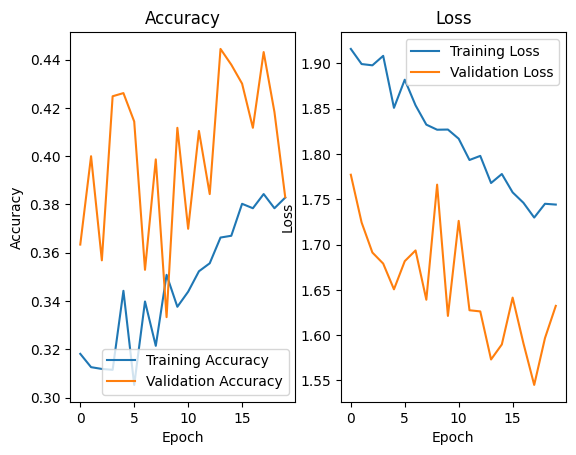

In [53]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
import onnxruntime as ort
import numpy as np
onnx_session = ort.InferenceSession('vehicle_model.onnx')

In [55]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

In [57]:
img_path = '/content/drive/MyDrive/vehicle_dataset/val/van/9_17858_10-21-08_009794.jpg'
preprocessed_img = preprocess_image(img_path)
predictions = model.predict(preprocessed_img)
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class index: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted class index: [0]
